<a href="https://colab.research.google.com/github/purna48291/project-/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# Data splitting
from sklearn.model_selection import train_test_split

# Surprise library for recommendation system
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

# Replace this with your local directory or filename
local_dir = './input'  # Example: place your CSV files in an 'input' folder

# List all files in the local directory
import os
for dirname, _, filenames in os.walk(local_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load a CSV file if available
file_path = os.path.join(local_dir, 'ecommerce_data.csv')  # Change file name as needed

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(df.head())

    # Ensure the dataframe has user_id, product_id, rating columns
    reader = Reader(rating_scale=(0, 5))
    data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)

    # Apply SVD algorithm
    algo = SVD()
    cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
else:
    print(f"No dataset found at {file_path}. Please place your dataset there.")


No dataset found at ./input/ecommerce_data.csv. Please place your dataset there.


In [22]:
import pandas as pd
import pandas as pd

# Correct path to your CSV file
file_path = r"/ratings_Electronics_mock.csv"# Added file name to the path


# Read the CSV with column names
df = pd.read_csv(file_path, names=['userId', 'productId', 'rating', 'timestamp'])

# Display a preview of the data
print(df.head())
# Read the CSV with column names
df = pd.read_csv(file_path, names=['userId', 'productId', 'rating', 'timestamp'])

# Display a preview of the data
print(df.head())

   userId  productId  rating   timestamp
0  userId  productId  rating   timestamp
1      U7         P3       1  1597453338
2      U4         P1       5  1589583549
3      U8         P4       3  1502235000
4      U5         P2       4  1523685747
   userId  productId  rating   timestamp
0  userId  productId  rating   timestamp
1      U7         P3       1  1597453338
2      U4         P1       5  1589583549
3      U8         P4       3  1502235000
4      U5         P2       4  1523685747


In [23]:
df.head()

,userId,productId,rating,timestamp
0,userId,productId,rating,timestamp
1,U7,P3,1,1597453338
2,U4,P1,5,1589583549
3,U8,P4,3,1502235000
4,U5,P2,4,1523685747


In [24]:
print("Total Reviews:",df.shape[0])
print("Total Columns:",df.shape[1])

Total Reviews: 51
Total Columns: 4


In [25]:
# Taking subset of the dataset
df = df.iloc[:5000,0:]

In [26]:
print("Total Reviews:",df.shape[0])
print("Total Columns:",df.shape[1])

Total Reviews: 51
Total Columns: 4


In [27]:
print("Total number of ratings :",df.rating.nunique())
print("Total number of users   :", df.userId.nunique())
print("Total number of products  :", df.productId.nunique())

Total number of ratings : 6
Total number of users   : 11
Total number of products  : 6


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     51 non-null     object
 1   productId  51 non-null     object
 2   rating     51 non-null     object
 3   timestamp  51 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [29]:
# Check missing value
df.isnull().sum()

,0
userId,0
productId,0
rating,0
timestamp,0


In [30]:
# Check Duplicate data
df[df.duplicated()].any()

,0
userId,False
productId,False
rating,False
timestamp,False


In [31]:
# rating describe summary
df.describe()['rating']

,rating
count,51
unique,6
top,4
freq,12


In [32]:
print("Unique value of Rating:",df.rating.unique())

Unique value of Rating: ['rating' '1' '5' '3' '4' '2']


In [35]:
import pandas as pd
# Correct path to your CSV file
file_path = r"/ratings_Electronics_mock.csv"

# Read the CSV with column names and setting header to 0
df = pd.read_csv(file_path, names=['userId', 'productId', 'rating', 'timestamp'], header=0)

# Display a preview of the data
print(df.head())

  userId productId  rating   timestamp
0     U7        P3       1  1597453338
1     U4        P1       5  1589583549
2     U8        P4       3  1502235000
3     U5        P2       4  1523685747
4     U7        P4       3  1537876684


In [36]:
# Average rating of products
ratings = pd.DataFrame(df.groupby('productId')['rating'].mean())
ratings['ratings_count'] = pd.DataFrame(df.groupby('productId')['rating'].count())
ratings['ratings_average'] = pd.DataFrame(df.groupby('productId')['rating'].mean())
ratings.head(10)

,rating,ratings_count,ratings_average
productId,,,
P1,3.583333,12,3.583333
P2,2.500000,12,2.500000
P3,3.166667,6,3.166667
P4,2.916667,12,2.916667
P5,3.875000,8,3.875000


<Axes: >

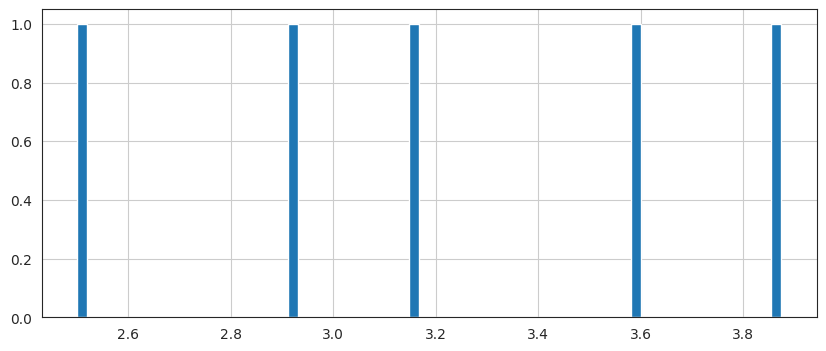

In [37]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

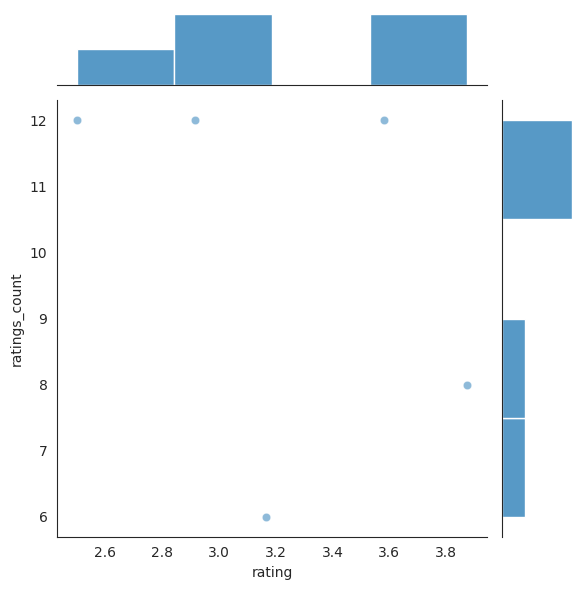

In [38]:
sns.jointplot(x='rating',y='ratings_count',data=ratings,alpha=0.5)

<Axes: xlabel='productId'>

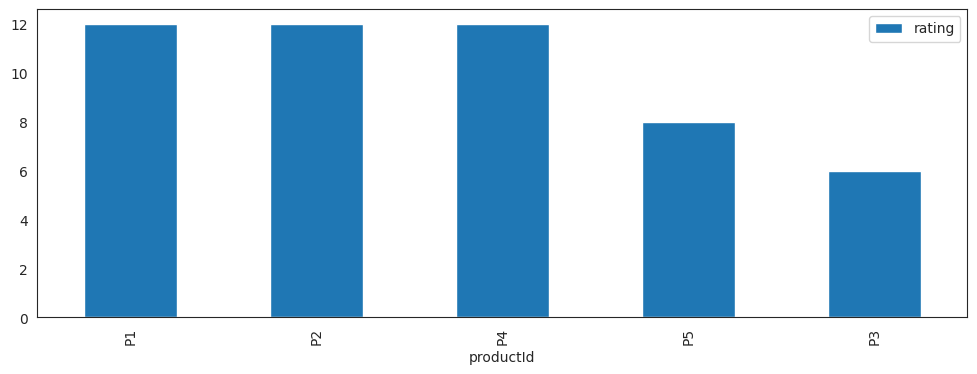

In [39]:
# Most top 30 products
popular_products = pd.DataFrame(df.groupby('productId')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(30).plot(kind = "bar",figsize=(12, 4))

In [40]:
vote_counts = ratings[ratings['ratings_count'].notnull()]['ratings_count'].astype('int')
vote_averages = ratings[ratings['ratings_average'].notnull()]['ratings_average'].astype('int')
C = vote_averages.mean()
print("Average rating of product across the whole dataset is",C)

Average rating of product across the whole dataset is 2.6


In [41]:
m = vote_counts.quantile(0.95)
print("Minimum votes required to be listed in the chart is",m)

Minimum votes required to be listed in the chart is 12.0


In [42]:
ratings.head()

,rating,ratings_count,ratings_average
productId,,,
P1,3.583333,12,3.583333
P2,2.500000,12,2.500000
P3,3.166667,6,3.166667
P4,2.916667,12,2.916667
P5,3.875000,8,3.875000


In [43]:
qualified = ratings[(ratings['ratings_count'] >= m) & (ratings['ratings_count'].notnull()) & (ratings['ratings_average'].notnull())][['ratings_count', 'ratings_average']]

In [44]:
qualified['ratings_count'] = qualified['ratings_count'].astype('int')
qualified['ratings_average'] = qualified['ratings_average'].astype('int')
qualified.head().sort_values(by='ratings_count', ascending=False)

,ratings_count,ratings_average
productId,,
P1,12,3
P2,12,2
P4,12,2


In [45]:
qualified.shape

(3, 2)

In [46]:
def weighted_rating(x):
    v = x['ratings_count']
    R = x['ratings_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [47]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [48]:
qualified = qualified.sort_values('wr', ascending=False).head(20)

In [49]:
qualified.head(10)

,ratings_count,ratings_average,wr
productId,,,
P1,12,3,2.8
P2,12,2,2.3
P4,12,2,2.3


Text(0, 0.5, 'Count')

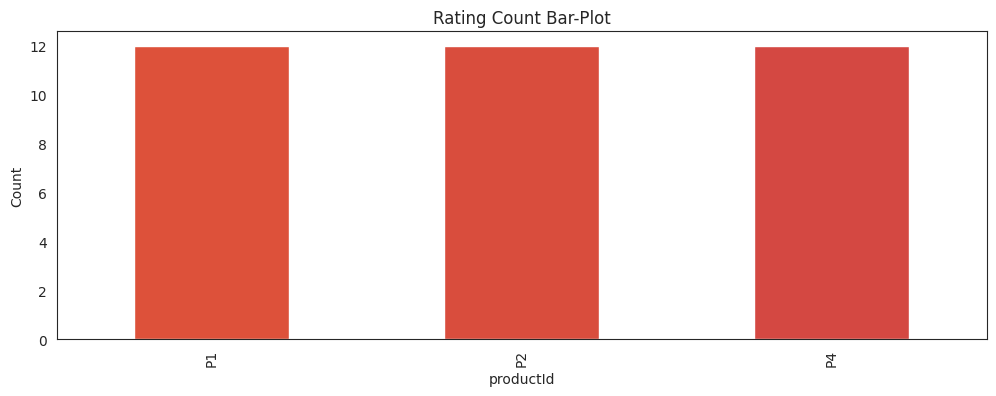

In [50]:
# Add color
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4, .8, 30))

rating_plot_count = qualified['ratings_count'].plot.bar(figsize=(12, 4),color=color)
rating_plot_count.set_title("Rating Count Bar-Plot")
rating_plot_count.set_xlabel("productId")
rating_plot_count.set_ylabel("Count")

Text(0, 0.5, 'rating')

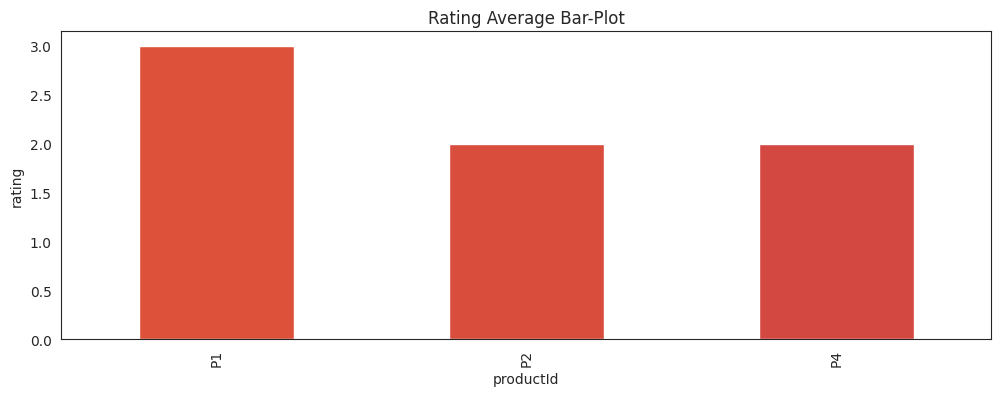

In [51]:
rating_plot_avg = qualified['ratings_average'].plot.bar(figsize=(12, 4),color=color)
rating_plot_avg.set_title("Rating Average Bar-Plot")
rating_plot_avg.set_xlabel("productId")
rating_plot_avg.set_ylabel("rating")

Text(0, 0.5, 'rating')

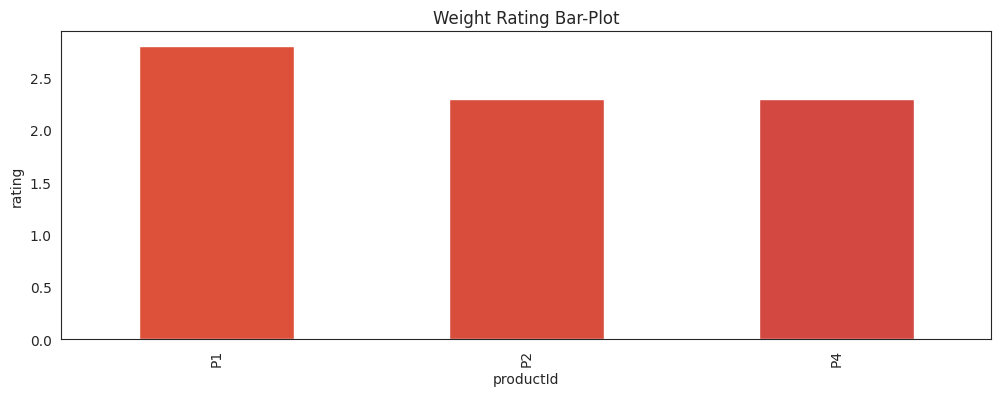

In [52]:
wr_plot = qualified['wr'].plot.bar(figsize=(12, 4),color=color)
wr_plot.set_title("Weight Rating Bar-Plot")
wr_plot.set_xlabel("productId")
wr_plot.set_ylabel("rating")

Content Based
Movie related

In [53]:
reader = Reader()

In [54]:
df.head()

,userId,productId,rating,timestamp
0,U7,P3,1,1597453338
1,U4,P1,5,1589583549
2,U8,P4,3,1502235000
3,U5,P2,4,1523685747
4,U7,P4,3,1537876684


In [55]:
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

In [56]:
# Use the famous SVD algorithm
svd = SVD()

# Run 5-fold cross-validation and then print results
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3451  1.7176  1.4767  1.4841  1.4478  1.4943  0.1222  
MAE (testset)     1.0728  1.4904  1.2418  1.3084  1.2783  1.2783  0.1338  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([1.34510242, 1.7175993 , 1.47665812, 1.48410118, 1.44783449]),
 'test_mae': array([1.07278068, 1.49039615, 1.24183765, 1.30836783, 1.27826014]),
 'fit_time': (0.0013184547424316406,
  0.001088857650756836,
  0.0009555816650390625,
  0.0004863739013671875,
  0.0005168914794921875),
 'test_time': (0.0006175041198730469,
  0.0001888275146484375,
  9.799003601074219e-05,
  4.9114227294921875e-05,
  4.935264587402344e-05)}

In [57]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [58]:
df.head()

,userId,productId,rating,timestamp
0,U7,P3,1,1597453338
1,U4,P1,5,1589583549
2,U8,P4,3,1502235000
3,U5,P2,4,1523685747
4,U7,P4,3,1537876684


In [59]:
df['userId'].value_counts()

,count
userId,
U7,7
U5,7
U8,6
U4,5
U10,5
U3,5
U2,5
U9,5
U6,3


In [60]:
# Check specific userId review
df[df['userId'] == 'A3LDPF5FMB782Z']

,userId,productId,rating,timestamp


In [61]:
# predict based on this data
svd.predict('A3LDPF5FMB782Z', '140053271X', 5.0)

Prediction(uid='A3LDPF5FMB782Z', iid='140053271X', r_ui=5.0, est=3.16, details={'was_impossible': False})